---

# TP 4 : Initiation à l'apprentissage automatique

<b>Polytech Sorbonne, Main 3</b><br>
Projet Python<br>
Auteur : Léo COMBARET

---

## Table des matières

- [Partie 1 : Traitement des données/Data Cleanin](#Partie1)
- [Partie 2 : Exploration des données/EDA](#Partie2)
- [Partie 3 : Mise en place d’un modèle de Machine Learnin](#Partie3)

In [1]:
import pandas as p
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<a id=Partie1></a>
## Partie 1 : Traitement des données/Data Cleanin

### Question 1

Nous disposons des attributs suivants: 
* Des données classiques tel que le nom de la chanson, de l'artiste, l'id et l'année et la date de sortie.
* Des données sur la chanson en elle même comme la durée en minutes, le tempo, la clé, l'intensité sonore, la clarté des paroles et des instruments.
* Des donnés sur la réception par le public de la chanson comme la dansabilité, l'énergie, l'explicité des paroles, la popularité et la valance

Les données sont en $float64$ pour les chiffres et en $object$ sinon

In [2]:
file = p.read_csv('./data_music_project.csv.gz')

file.dtypes
file.columns

Index(['acousticness', 'artists', 'danceability', 'energy', 'explicit', 'id',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name',
       'popularity', 'release_date', 'speechiness', 'tempo', 'valence', 'year',
       'duration_min'],
      dtype='object')

### Question 2

J'ai procédé à trois étapes de nettoyages:
* D'abord, j'ai utilisé la fonction *drop_duplicates* va nous permettre de supprimer les lignes pour lesquelles il existent des doublons des index $id$ et ensuite les doublons des chansons $name$ qui n'ont pas le même nom d'$artists$
* Ensuite on utilise la fonction *dropna* pour enlever les lignes dans lesquelles ils nous manque des données
* Enfin, on réorganise l'ordre des index pour qu'ils aient un ordre logique

In [3]:
file = file.drop_duplicates(subset=['id'])
file = file.drop_duplicates(subset=['name','artists'])
file = file.dropna()
file = file.sort_values(by='artists')
file = file[['id','artists','name','duration_min', 'year', 'release_date', 'key', 'tempo', 'popularity', 'energy', 'acousticness', 'danceability', 'instrumentalness', 'liveness', 'speechiness', 'loudness', 'explicit', 'mode', 'valence']]
file = file.reset_index()
file

,index,id,artists,name,duration_min,year,release_date,key,tempo,popularity,energy,acousticness,danceability,instrumentalness,liveness,speechiness,loudness,explicit,mode,valence
0,51574,6ZCkhQPdBtUzZPkkO1o9cx,"[""'Til Tuesday""]",Coming Up Close,4.666667,1986.0,1986-11-04,8.0,80.186,37.0,0.473,0.1810,0.368,0.000251,0.0665,0.0316,-14.943,0.0,1.0,0.2730
1,151760,2uYMbE0sFDyujyxIzIUiqf,"[""'Til Tuesday""]",Love in a Vacuum,3.600667,1985.0,1985-06-01,4.0,123.124,25.0,0.638,0.2070,0.657,0.000000,0.0842,0.0576,-7.992,0.0,1.0,0.8120
2,87166,5Abd8qlHxfliMmkggUCiSY,"[""'Til Tuesday""]",What About Love,3.937783,1986.0,1986-11-04,7.0,104.114,32.0,0.539,0.0606,0.579,0.185000,0.0993,0.0273,-13.573,0.0,0.0,0.7960
3,167074,6i9TOevIr3XDVq2MMzbB6C,"[""'Til Tuesday""]",Winning the War,4.076450,1985.0,1985-06-01,11.0,118.882,23.0,0.710,0.2620,0.696,0.000926,0.4120,0.0310,-8.631,0.0,0.0,0.7890
4,166405,6oOmpBInMQ3uOzgfRB4Z71,"[""100 First Songs' Participants""]",באנו חושך לגרש,0.883333,1982.0,1982-02-01,0.0,132.450,34.0,0.360,0.6820,0.676,0.000006,0.0628,0.2810,-15.708,0.0,1.0,0.5930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145096,87968,1M97kKsHd1mw2rj4WCH2TA,['黃品源'],你怎麼捨得我難過,4.897333,1990.0,1990-06-30,9.0,135.934,47.0,0.334,0.5410,0.578,0.000006,0.0675,0.0267,-11.974,0.0,0.0,0.2430
145097,153330,3KIuCzckjdeeVuswPo20mC,['黑豹'],DON'T BREAK MY HEART,5.269333,1992.0,1992-12-22,11.0,200.341,34.0,0.686,0.3810,0.353,0.000000,0.0568,0.0395,-9.103,0.0,1.0,0.3520
145098,166711,4FG1uHQAVPsYiXIn3tcGRs,['김수철'],못다핀 꽃한송이,3.154083,1983.0,1983-08-15,4.0,79.114,24.0,0.321,0.5090,0.456,0.000001,0.1560,0.0314,-16.682,0.0,0.0,0.2100
145099,173888,6ra76urfo3pTD050opXTZS,"['김효근', 'Quinever 퀸에버']",Promise of Thousand Years 천 년의 약속,5.697017,2019.0,2019-10-18,3.0,138.300,0.0,0.321,0.9390,0.174,0.756000,0.6950,0.0422,-13.411,0.0,1.0,0.0554


<a id=Partie2></a>
## Partie 2 : Exploration des données/EDA

### Question 1

Tout d'abord, on va visualiser les corrélations qui existent entre les différentes variables. Nous observons que l'énergie est très corrélée avec l'intensité du son.

<AxesSubplot:>

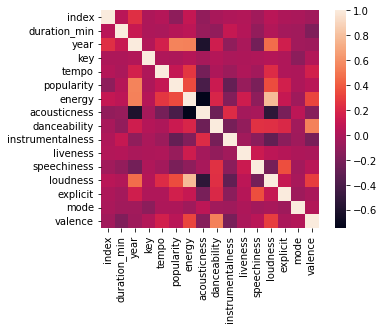

In [4]:
corr = file.corr()
sns.heatmap(corr, square=True)

On va créer une heatmap qui donne l'intensité de la popularité selon la longueur de la musique et de l'année de sortie

<AxesSubplot:xlabel='year', ylabel='duration_min'>

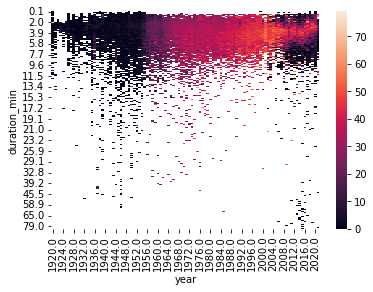

In [5]:
popularity = p.DataFrame(({
    'duration_min': round(file.duration_min,1),
    'year': file.year,
    'popularity': file.popularity,
    'energy': file.energy
}))

sns.heatmap(popularity.pivot_table(index= 'duration_min', columns='year', values='popularity'))

Avec cette représentation de heatmap, nous remarquons que nous avons énormément de chansons qui durent plus de 10 min qui nous empêchent d'analser au mieux les données. De plus, les chansons sortis avant 1950 n'ont pas bcp de popularité. Nous allons donc affiner nos analyses.

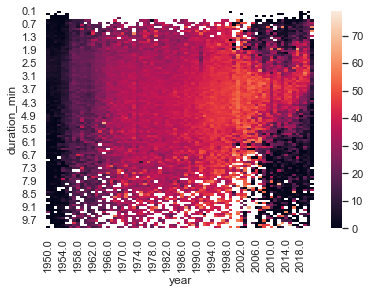

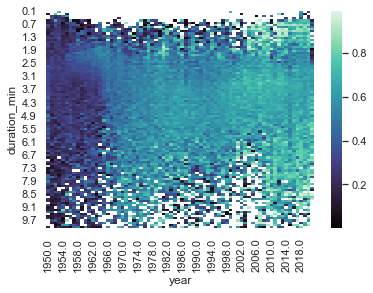

In [6]:
popularity = popularity[popularity['duration_min'] <= 10]
popularity = popularity[popularity['year'] >= 1950]
sns.set_theme(style="whitegrid")

#sns.relplot(data=popularity, x="year", y="duration_min", size="popularity", hue="energy")
sns.heatmap(popularity.pivot_table(index= 'duration_min', columns='year', values='popularity'))
plt.show()
sns.heatmap(popularity.pivot_table(index= 'duration_min', columns='year', values='energy'), cmap="mako")
plt.show()

* On remarque que les musiques les plus populaires sont celles sortis dans les années 2000 ~ 2010 et qui durent entre 2,5 et 5 min
* On observe aussi que les musiques deviennent de plus en plus énergétique au fur et à mesure du temps et donc que les gens aiment les musiques énergétiques mais pas trop

Je vais dans un second temps voir selon l'alphabet des noms des artistes et des chansons, quel pays est le plus populaire.
Le code ci-dessous permet de retirer tous les noms avec des chiffres ainsi que ceux qui ne sont pas traités par *detect* et que j'ai stocké dans un fichier csv

In [7]:
from langdetect import detect
import re
def has_numbers (x):
    return bool(re.search(r'\d', x))

alphabet = p.DataFrame(({
    'artists': file.artists,
    'name': file.name,
    'artists_alpha': file.artists,
    'name_alpha': file.name,
    'popularity': file.popularity
}))
alphabet["artists_alpha"] = alphabet["artists"].apply(has_numbers,'index')
alphabet["name_alpha"] = alphabet["name"].apply(has_numbers,'index')
alphabet = alphabet[alphabet['artists_alpha'] == False]
alphabet = alphabet[alphabet['name_alpha'] == False]
alphabet = alphabet.reset_index()
alphabet = alphabet.drop([alphabet.index[5904], alphabet.index[10628], alphabet.index[36797], alphabet.index[36789], alphabet.index[64187], alphabet.index[72220], alphabet.index[94634], alphabet.index[112505]])
alphabet = alphabet.reset_index()
alphabet = alphabet.drop(alphabet.index[36794])
alphabet["artists_alpha"] = alphabet["artists"].apply(detect,'index')
alphabet["name_alpha"] = alphabet["name"].apply(detect,'index')
alphabet.to_csv('Alphabet_origin.csv')
alphabet


for i in range(len(alphabet['artists'])):
    try:
        alphabet["name_alpha"][i] = detect(alphabet["name"][i])
        alphabet["artists_alpha"][i] = detect(alphabet["artists"][i])
    except:
        alphabet["name_alpha"][i] = "error"
        alphabet["artists_alpha"][i] = "error"
        print("This row throws and error:", i)

Ainsi nous importons le fichier csv pour pouvoir analyser les donnés selon l'origine des noms

### Analyse alphabétique du nom des artistes

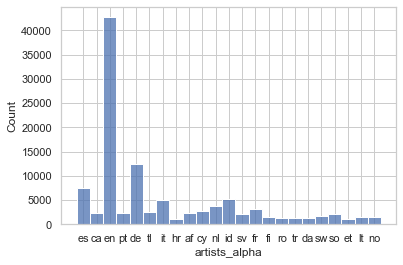

en    42736
de    12397
es     7402
id     5133
it     5009
nl     3735
fr     3073
cy     2754
tl     2519
ca     2265
af     2258
pt     2217
sv     2159
so     2021
sw     1719
lt     1568
no     1487
fi     1484
ro     1378
da     1273
tr     1228
et     1123
hr     1050
Name: artists_alpha, dtype: int64


In [8]:
alpha = p.read_csv('./Alphabet_origin.csv')
alpha1 = alpha[alpha.groupby('artists_alpha').artists_alpha.transform('count')>1000]
sns.histplot(data=alpha1, x="artists_alpha")
plt.show()
print(alpha1["artists_alpha"].value_counts())

### Analyse alphabétique du nom des chansons

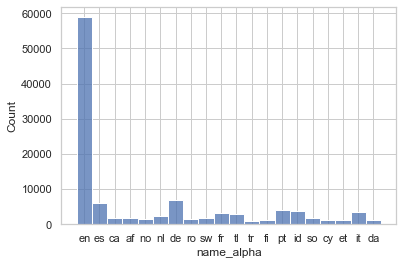

en    58884
de     6894
es     6073
pt     4136
id     3752
it     3543
fr     3184
tl     2996
nl     2394
so     1873
sw     1765
af     1732
ca     1686
no     1424
ro     1367
fi     1209
cy     1118
da     1075
et     1071
tr     1025
Name: name_alpha, dtype: int64


In [9]:
alpha2 = alpha[alpha.groupby('name_alpha').name_alpha.transform('count')>1000]
sns.histplot(data=alpha2, x="name_alpha")
plt.show()
print(alpha2["name_alpha"].value_counts())

On constate donc que les chansons et les artistes les plus populaires sont anglais et nous constatons aussi une belle présence européenne dans le haut du tableau. 

## Question 2

Analysons les chansons de mon artiste préféré: The Week-End

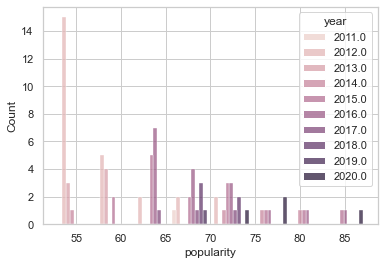

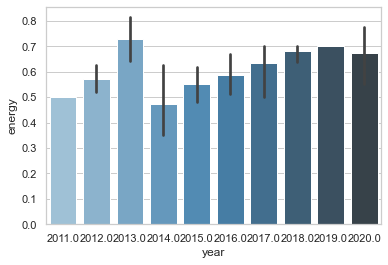

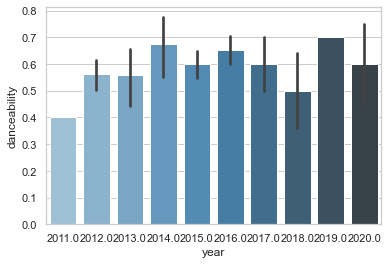

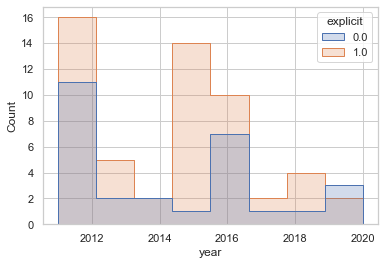

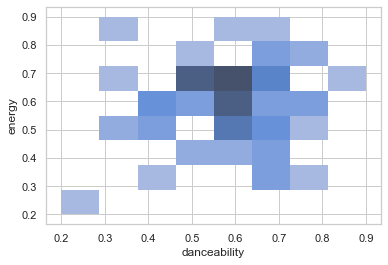

C:\Users\lcomb\AppData\Local\Temp/ipykernel_14576/2969888227.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(y="popularity", x="year", data=sweatspot[mask], palette="Set3", linewidth=2.5)


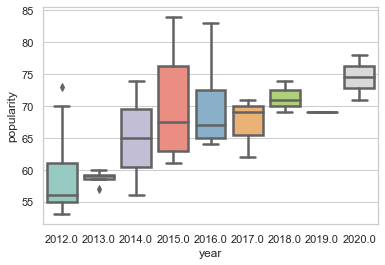

In [10]:
mask = file['artists'].apply(lambda x: 'The Weeknd' in x)
file['danceability'] = round(file["danceability"],1)
file['energy'] = round(file["energy"],1)

sns.histplot(file[mask], x="popularity", hue="year", multiple="dodge")
plt.show()
sns.barplot(x="year", y="energy", data=file[mask],palette="Blues_d")
plt.show()
sns.barplot(x="year", y="danceability", data=file[mask],palette="Blues_d")
plt.show()
sns.histplot(file[mask], x="year", hue="explicit", element="step")
plt.show()
sns.histplot(file[mask], x="danceability", y="energy")
plt.show()

sweatspot = file[file['danceability'] <= 0.7]
sweatspot = sweatspot[sweatspot['danceability'] >= 0.5]
sweatspot = sweatspot[sweatspot['energy'] >= 0.5]
sweatspot = sweatspot[sweatspot['danceability'] <= 0.8]
sns.boxplot(y="popularity", x="year", data=sweatspot[mask], palette="Set3", linewidth=2.5)
plt.show()



Ainsi *The Weeknd* est devenu au fil des années, un artiste de plus en plus connu sur la scène musicale dans laquelle, à travers les années, augmenter et stabiliser l'énergie et la dansabilité de ses musiques tout en réduisant ses chansons explicites. Ainsi, au fil des années, The Weeknd a réussi à trouver son style et les auditeurs ont petit à petit appris à apprécier sa patte musicale.

<a id=Partie3></a>
## Partie 3 : Mise en place d’un modèle de Machine Learnin

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

### Question 1 : Détermination des attributs
Les attributs que j'ai choisi sont les suivants: L'année de sortie et la durée de la chanson car nous avons remarqué dans les analyses précédentes que ce sont des facteurs très important pour la popularité d'une chanson selon si elle son format propice pour une plateforme de streaming. J'ai choisi de même l'énergie, la tempo et l'acousticeness afin de pouvoir reconnaitre les styles de chaque musique et ainsi voir si la musique mise en entrée se rapproche des "codes de popularité" d'une chanson de même style.

In [12]:
x = file[[ 'year', 'duration_min', 'instrumentalness', 'speechiness', 'loudness']] #nos variables
y = file[['popularity']] #notre target à prédir

In [13]:
x.info()
len(x)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145101 entries, 0 to 145100
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   year              145101 non-null  float64
 1   duration_min      145101 non-null  float64
 2   instrumentalness  145101 non-null  float64
 3   speechiness       145101 non-null  float64
 4   loudness          145101 non-null  float64
dtypes: float64(5)
memory usage: 5.5 MB


145101

### Question 2 : Gradient Boosting Regressor et MSE 

In [14]:
# Les hyperparamètres pour le GradientBoostingRegressor
gbr_params = {'n_estimators': 1000,
            'max_depth': 3,
            'min_samples_split': 5,
            'learning_rate': 0.01,
            'loss': 'squared_error'}
# Créé une instance pour le gradient boosting regressor
gbr = GradientBoostingRegressor(**gbr_params)

def gradient_boosting(x):
    # Créé le training et le test
    x_train, x_test, y_train, y_test = train_test_split(x,np.ravel(y), test_size=0.66, random_state=42)
    # Fit le modèle
    gbr.fit(x_train, y_train)
    # Print le coefficient de détermination R^2
    print("Model Accuracy: %.3f" % gbr.score(x_test, y_test))
    # Créé le MSE
    mse = mean_squared_error(y_test, gbr.predict(x_test))
    print("L'erreur MSE sur le test set est: {:.4f}".format(mse))

gradient_boosting(x)

Model Accuracy: 0.592
L'erreur MSE sur le test set est: 197.6863


On a donc une précision d'un peu près 60% pour ce modèle d'attributs.
C'est un résultat convenable mais pas assez suffisant pour être fiable.

### Question 3 : Régression linéaire

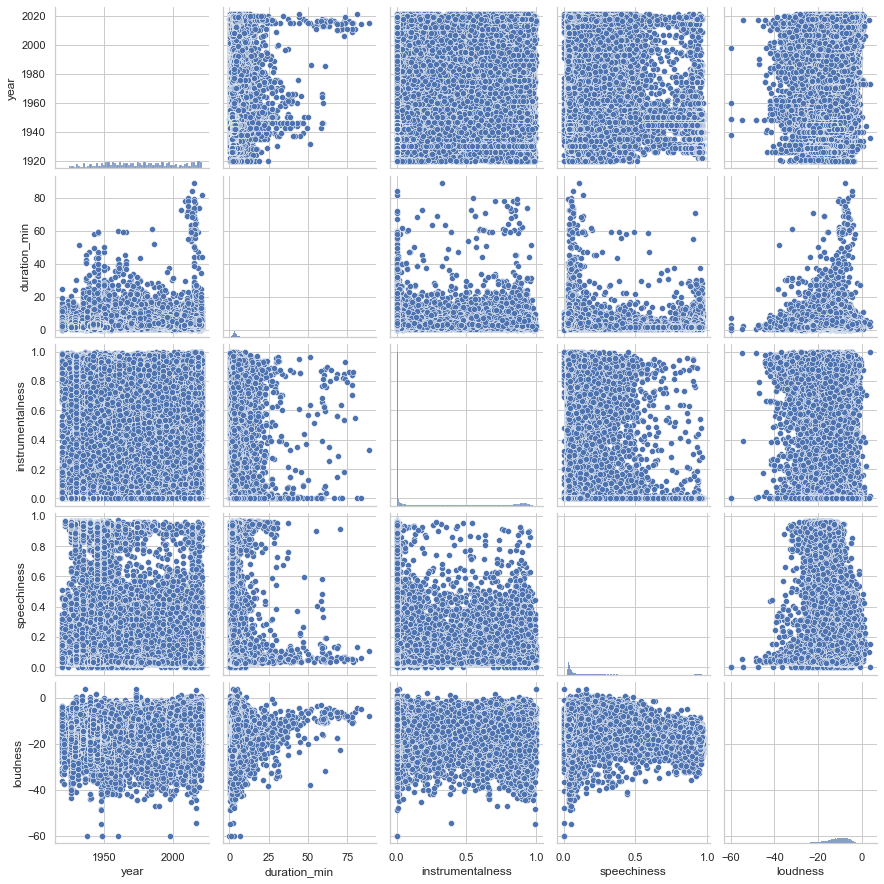

In [15]:
sns.pairplot(x);

In [16]:
#instancier modèle
model = LinearRegression()
#entrainement du modèle
results = model.fit(x, y)
print("les coefficients de la fonction sont: ", results.intercept_, results.coef_)

#precision
precision = model.score(x, y)
print("la précision du modèle linéaire est: ", precision*100)


les coefficients de la fonction sont:  [-747.19334088] [[  0.39419377  -0.0699477  -16.17694805 -14.63570499   0.0780953 ]]
la précision du modèle linéaire est:  36.54873353002511


Ici, nous obtenons 36% de précision par rapport à 60 avec GBR donc le modèle GBR est nettement plus performant

### Question 4 : Determination des attributs les plus importants

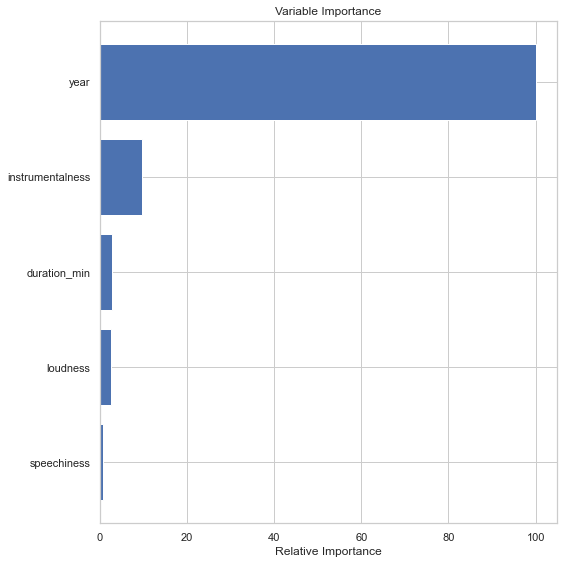

In [17]:
from sklearn.inspection import permutation_importance

def importance(x) :
    feature_importance = gbr.feature_importances_

    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5

    fig = plt.figure(figsize=(8, 8))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, np.array(x.columns)[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')

    fig.tight_layout()
    plt.show

importance(x)


Ce résultat me paraît très cohérent car l'attribut avec le plus d'importance est 'year' comme je l'attendais.
'instrumentalness' est le deuxième attribut avec le plus d'importance. J'en déduis donc que cela permet de c'est cet attribut en particulier qui permet de connaitre sur le style de la musique.

### Question 5 : Chansons après 1975

Model Accuracy: 0.324
L'erreur MSE sur le test set est: 298.0305


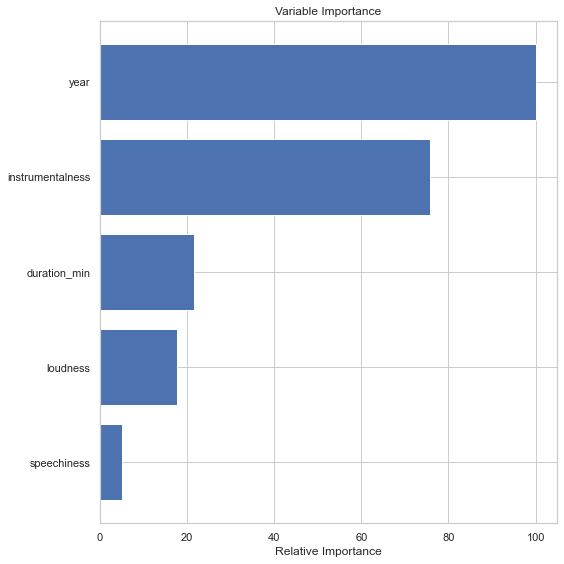

In [18]:
file = file[file['year'] >= 1975]
x = file[[ 'year', 'duration_min', 'instrumentalness', 'speechiness', 'loudness']] #nos variables
y = file[['popularity']] #notre target à prédir

gradient_boosting(x)
importance(x)


On remarque qu'en filtrant les données, on observe bien que l'importance de 'year' a drasqtiquement baissé ainsi que la précision. 

### Question 6 : K-fold cross-validation

In [29]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [35]:
scores = - cross_val_score(gbr, x, np.ravel(y), cv=2, scoring = 'neg_mean_absolute_error')
print('Cross-validated scores:', scores)

Cross-validated scores: [12.68447133 13.07169031]


In [36]:
np.mean(scores)

12.878080820083941